<a href="https://colab.research.google.com/github/Shrey-Prabhu/DeepThinkers_YashPathare/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy pandas matplotlib seaborn scikit-learn tensorflow

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [ ]:
df = pd.read_csv('prices.csv')
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [ ]:
def train_and_predict(company):
    # Filter data for selected company
    df1 = df[df['symbol'] == company].copy()
    df1.sort_values(by='date', inplace=True)

    # Selecting relevant features
    X = df1[['open', 'high']]
    y = df1['close']
    length = 100

    # Splitting data into train & test
    split_index = int(len(X) * 0.8)
    training_set = X.iloc[:split_index].values
    test_set = X.iloc[split_index:].values

    # Normalize Data
    sc = MinMaxScaler(feature_range=(0, 1))
    training_set_scaled = sc.fit_transform(training_set)
    test_set_scaled = sc.transform(test_set)

    # Creating sequences for LSTM
    def create_sequences(data, length):
        X_seq, y_seq = [], []
        for i in range(length, len(data)):
            X_seq.append(data[i-length:i, 0])
            y_seq.append(data[i, 0])
        return np.array(X_seq), np.array(y_seq)

    X_train, y_train = create_sequences(training_set_scaled, length)
    X_test, y_test = create_sequences(test_set_scaled, length)

    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    model = Sequential([
        LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        Dropout(0.2),
        LSTM(units=50, return_sequences=True),
        Dropout(0.2),
        LSTM(units=50, return_sequences=True),
        Dropout(0.2),
        LSTM(units=50),
        Dropout(0.2),
        Dense(units=1)
    ])

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=32)

    pred = model.predict(X_test)

    r2 = r2_score(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    mae = mean_absolute_error(y_test, pred)

    plt.figure(figsize=(15, 8))
    plt.title(f"Test vs Predicted value for {company}", size=20, weight='bold')
    plt.plot(y_test, label='Actual')
    plt.plot(pred, label='Predicted')
    plt.legend()
    plt.text(50, 1.5, f'R2 Score: {r2:.2f}')
    plt.text(50, 1.35, f'MSE: {mse:.2f}')
    plt.text(50, 1.25, f'MAE: {mae:.2f}')
    plt.show()

Enter stock symbol (e.g., AMZN, GOOG, AAPL): AMZN
Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 146ms/step - loss: 0.0350 - val_loss: 0.0861
Epoch 2/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - loss: 0.0042 - val_loss: 0.0559
Epoch 3/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 128ms/step - loss: 0.0039 - val_loss: 0.0223
Epoch 4/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 128ms/step - loss: 0.0043 - val_loss: 0.0128
Epoch 5/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - loss: 0.0031 - val_loss: 0.0228
Epoch 6/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - loss: 0.0028 - val_loss: 0.0133
Epoch 7/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 128ms/step - loss: 0.0025 - val_loss: 0.0058
Epoch 8/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 127ms/step - loss: 0.0026 - val_loss: 0.0055
Epoch 9/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 126ms/step - loss: 0.0022 - val_loss: 0.0095
Epoch 10/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 135ms/step - loss: 0.0024 - val_loss: 0.0129
Epoch 11/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - loss: 0.0022 - val_loss: 0.0047
Epoch 12/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 136ms/step - l

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step


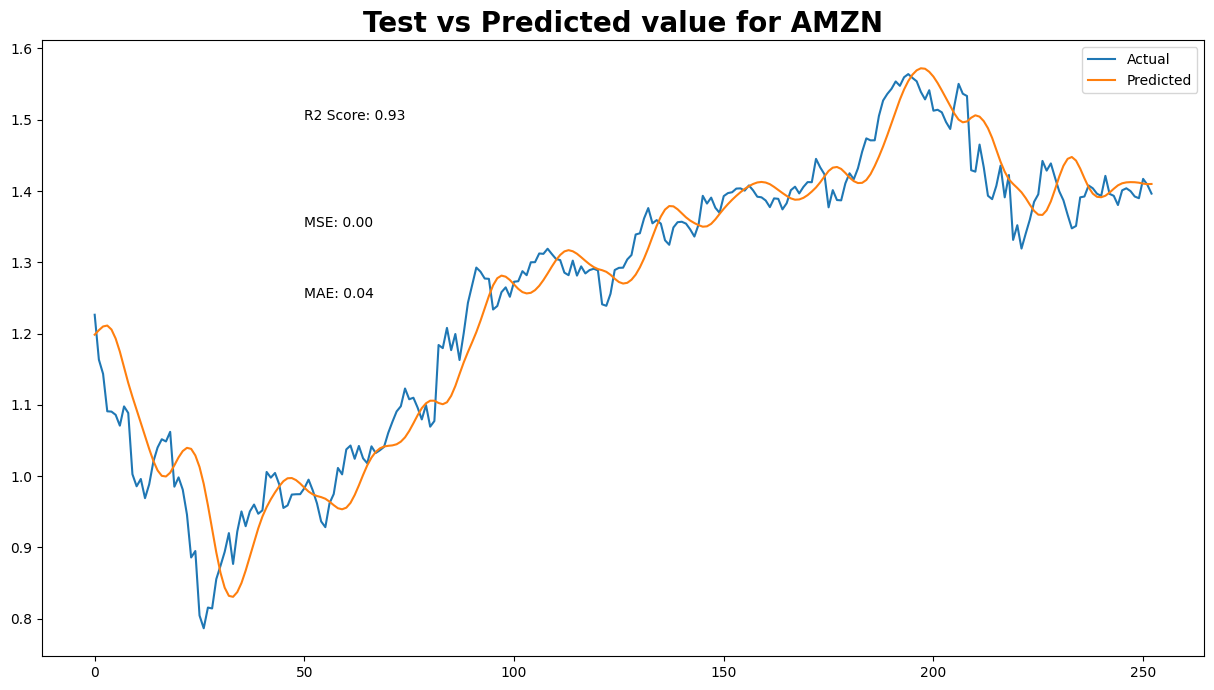

In [8]:
company = input("Enter stock symbol (e.g., AMZN, GOOG, AAPL): ").upper()
if company in df['symbol'].unique():
    train_and_predict(company)
else:
    print("Stock symbol not found!")
